In [1]:
import yahoo_fin.stock_info as si
import pandas as pd
import nsepy
import numpy as np
import re

from time import sleep

In [257]:
pwd

'C:\\Users\\Aman\\StockAnalysis'

In [2]:
import requests # for http requests
from bs4 import BeautifulSoup # for html parsing and scraping
from fastnumbers import isfloat 
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 
import bs4

In [3]:
def ffloat(string):
    if string is None:
        return np.nan
    if type(string)==float or type(string)==np.float64:
        return string
    if type(string)==int or type(string)==np.int64:
        return string
    return fast_float(string.split(" ")[0].replace(',','').replace('%',''),
                      default=np.nan)

In [4]:
def get_table( url):
#     round_url = f'{url}/{round}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    rows = []
    for child in soup.find_all('table')[1].children:
        row = []
        for td in child:
            try:
                row.append(td.text.replace('\n', ''))
            except:
                continue
        if len(row) > 0:
            rows.append(row)

    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

In [5]:
def rel(res):
    res = res.apply(lambda x: x.str.replace(',', ''))
    return res

In [6]:
def example(stock):
    Months = []
    r = re.compile("Mar.*")
    Months =  list(filter(r.match, stock.columns))
    return Months
    

['Mar 21', 'Mar 20', 'Mar 19', 'Mar 18', 'Mar 17']

In [65]:
PNL_list.keys()

dict_keys(['pnl_axis_pnl', 'pnl_inden_pnl', 'pnl_pnb_pnl', 'pnl_rbl_pnl', 'pnl_sbi_pnl', 'pnl_yes_pnl', 'pnl_hdfc_pnl', 'pnl_icici_pnl', 'pnl_kotak_pnl', 'pnl_indusind_pnl', 'pnl_bandhan_pnl', 'pnl_idfc_pnl', 'pnl_federal_pnl', 'pnl_au_smallfinac_pnl'])

##### Functions defined in loop

In [7]:
def cagr(stock, mode):
    months = example(stock)
    result = []

    for i in range(0, len(months)-1):

        result.append( 
            (
                (stock[stock.iloc[:, 1].isin(mode)][months[i]]).astype('float').values  
                 / (stock[stock.iloc[:, 1].isin(mode)][months[i+1]]).astype('float').values
                - 1)*100  )
    return result


In [8]:
def value(stock, mode):
    months = example(stock)
    values = []
    for i in range(0, len(months)):

        values.append((stock[stock.iloc[:, 1] == mode][months[i]]).astype('float').values)

    return values

In [9]:
def freecashflow(stockcs, stockbs):
    months = example(stockcs)
    value = []
    for i in range(0, len(months)):

        value.append((stockcs[stockcs.iloc[:, 1] == 'Net CashFlow From Operating Activities'][months[i]]).astype('float').values - (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets'][months[i]]).astype('float').values)

    return value

In [10]:
def roe(stockPNL, stockbs):
    months = example(stockPNL)
    returnequity = []
    for i in range(0, len(months)):

        returnequity.append((stockPNL[stockPNL.iloc[:, 1] == 'Profit/Loss For The Period'][months[i]]).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds'][months[i]]).astype('float').values)

    return returnequity

In [11]:
def DE( stockbs):
    months = example(stockbs)
    debtequity = []
    for i in range(0, len(months)):

        debtequity.append((stockbs[stockbs.iloc[:, 1].isin(['Total Capital And Liabilities','Total Capital and Liabilities'])][months[i]]).astype('float').values / (stockbs[stockbs.iloc[:, 1].isin(['Total Shareholders Funds','Total ShareHolders Funds'])][months[i]]).astype('float').values)

    return debtequity

In [12]:
# (balancesheet_list['BS_axis_bs'][balancesheet_list['BS_axis_bs'].iloc[:, 1] =='Total Capital and Liabilities']['Mar 21']).astype('float').values 

In [13]:
# balancesheet_list['BS_axis_bs']

In [14]:
def get_scrip_info(url):
    original_url = url
    key_val_pairs = {}
    
    page_response = requests.get(url, timeout=240)
    page_content = BeautifulSoup(page_response.content, "html.parser")
    name = page_content.find('h1').text


    volume = ffloat(page_content.find('td',{'class':'nsevol bsevol'}).text)
    eps = ffloat(page_content.find('td',{'class':'nseceps bseceps'}).text)
    pe = ffloat(page_content.find('td',{'class':'nsepe bsepe'}).text)
    sector_pe = ffloat(page_content.find('td',{'class':'nsesc_ttm bsesc_ttm'}).text)
    market_cap = ffloat(page_content.find('td',{'class':'nsemktcap bsemktcap'}).text)
    open_price = ffloat(page_content.find('td',{'class':'nsemktcap bsemktcap'}).text)
    opn_prc = ffloat(page_content.find('td',{'class':'nseopn bseopn'}).text)
    cls_prc = ffloat(page_content.find('td',{'class':'nseprvclose bseprvclose'}).text)
    vwap = ffloat(page_content.find('td',{'class':'nsevwap bsevwap'}).text)
    nsebeta = ffloat(page_content.find('td',{'class':'Beta'}))
    bsebeta = ffloat(page_content.find('td',{'class':'bsebeta'}))
    high = ffloat(page_content.find('td',{'class':'nseHP bseHP'}).text)
    low = ffloat(page_content.find('td',{'class':'nseLP bseLP'}).text)
    wh52 = ffloat(page_content.find('td',{'class':'nseH52 bseH52'}).text)
    wl52 = ffloat(page_content.find('td',{'class':'nseL52 bseL52'}).text)
    pb = ffloat(page_content.find('td',{'class':'nsepb bsepb'}).text)
    fv = ffloat(page_content.find('td',{'class':'nsefv bsefv'}).text)
    return high,low , name,nsebeta, volume, eps, pe, sector_pe, market_cap

##### URLs

In [15]:
# Purchsed Stock
# Balance Sheet
axis_bs = "https://www.moneycontrol.com/financials/axisbank/balance-sheetVI/AB16"
inden_bs = "https://www.moneycontrol.com/financials/indianenergyexchange/balance-sheetVI/IEE"
pnb_bs = "https://www.moneycontrol.com/financials/punjabnationalbank/balance-sheetVI/PNB05"
rbl_bs = "https://www.moneycontrol.com/financials/rblbank/balance-sheetVI/RB03"
sbi_bs = "https://www.moneycontrol.com/financials/statebankindia/balance-sheetVI/SBI"
yes_bs = "https://www.moneycontrol.com/financials/yesbank/balance-sheetVI/YB"
# PnL
axis_pnl = "https://www.moneycontrol.com/financials/axisbank/profit-lossVI/AB16"
inden_pnl = "https://www.moneycontrol.com/financials/indianenergyexchange/profit-lossVI/IEE"
pnb_pnl = "https://www.moneycontrol.com/financials/punjabnationalbank/profit-lossVI/PNB05"
rbl_pnl = "https://www.moneycontrol.com/financials/rblbank/profit-lossVI/RB03"
sbi_pnl = "https://www.moneycontrol.com/financials/statebankindia/profit-lossVI/SBI"
yes_pnl = "https://www.moneycontrol.com/financials/yesbank/profit-lossVI/YB"
# Cash Statement
axis_cs = "https://www.moneycontrol.com/financials/axisbank/cash-flowVI/AB16"
inden_cs = "https://www.moneycontrol.com/financials/indianenergyexchange/cash-flowVI/IEE"
pnb_cs = "https://www.moneycontrol.com/financials/punjabnationalbank/cash-flowVI/PNB05"
rbl_cs = "https://www.moneycontrol.com/financials/rblbank/cash-flowVI/RB03"
sbi_cs = "https://www.moneycontrol.com/financials/statebankindia/cash-flowVI/SBI"
yes_cs = "https://www.moneycontrol.com/financials/yesbank/cash-flowVI/YB"

In [16]:
# Benchmark Stocks
# Balance Sheet
hdfc_bs = "https://www.moneycontrol.com/financials/hdfcbank/balance-sheetVI/HDF01"
icici_bs = "https://www.moneycontrol.com/financials/icicibank/balance-sheetVI/ICI02"
kotak_bs = "https://www.moneycontrol.com/financials/kotakmahindrabank/balance-sheetVI/KMB"
sbi_bs = "https://www.moneycontrol.com/financials/statebankindia/balance-sheetVI/SBI"
axis_bs = "https://www.moneycontrol.com/financials/axisbank/balance-sheetVI/AB16"
indusind_bs = "https://www.moneycontrol.com/financials/indusindbank/balance-sheetVI/IIB"
pnb_bs = "https://www.moneycontrol.com/financials/punjabnationalbank/balance-sheetVI/PNB05"
bandhan_bs ="https://www.moneycontrol.com/financials/bandhanbank/balance-sheetVI/BB09"
idfc_bs = "https://www.moneycontrol.com/financials/idfcfirstbank/balance-sheetVI/IDF01"
rbl_bs = "https://www.moneycontrol.com/financials/rblbank/balance-sheetVI/RB03"
federal_bs = "https://www.moneycontrol.com/financials/federalbank/balance-sheetVI/FB"
au_smallfinac_bs = "https://www.moneycontrol.com/financials/ausmallfinancebank/balance-sheetVI/ASF02"

In [17]:
# PnL

hdfc_pnl = "https://www.moneycontrol.com/financials/hdfcbank/profit-lossVI/HDF01"
icici_pnl = "https://www.moneycontrol.com/financials/icicibank/profit-lossVI/ICI02"
kotak_pnl = "https://www.moneycontrol.com/financials/kotakmahindrabank/profit-lossVI/KMB"
sbi_pnl = "https://www.moneycontrol.com/financials/statebankindia/profit-lossVI/SBI"
axis_pnl = "https://www.moneycontrol.com/financials/axisbank/profit-lossVI/AB16"
indusind_pnl = "https://www.moneycontrol.com/financials/indusindbank/profit-lossVI/IIB"
pnb_pnl = "https://www.moneycontrol.com/financials/punjabnationalbank/profit-lossVI/PNB05"
bandhan_pnl ="https://www.moneycontrol.com/financials/bandhanbank/profit-lossVI/BB09"
idfc_pnl = "https://www.moneycontrol.com/financials/idfcfirstbank/profit-lossVI/IDF01"
rbl_pnl = "https://www.moneycontrol.com/financials/rblbank/profit-lossVI/RB03"
federal_pnl = "https://www.moneycontrol.com/financials/federalbank/profit-lossVI/FB"
au_smallfinac_pnl = "https://www.moneycontrol.com/financials/ausmallfinancebank/profit-lossVI/ASF02"

In [18]:
# CS

hdfc_cs = "https://www.moneycontrol.com/financials/hdfcbank/cash-flowVI/HDF01"
icici_cs = "https://www.moneycontrol.com/financials/icicibank/cash-flowVI/ICI02"
kotak_cs = "https://www.moneycontrol.com/financials/kotakmahindrabank/cash-flowVI/KMB"
sbi_cs = "https://www.moneycontrol.com/financials/statebankindia/cash-flowVI/SBI"
axis_cs = "https://www.moneycontrol.com/financials/axisbank/cash-flowVI/AB16"
indusind_cs = "https://www.moneycontrol.com/financials/indusindbank/cash-flowVI/IIB"
pnb_cs = "https://www.moneycontrol.com/financials/punjabnationalbank/cash-flowVI/PNB05"
bandhan_cs ="https://www.moneycontrol.com/financials/bandhanbank/cash-flowVI/BB09"
idfc_cs = "https://www.moneycontrol.com/financials/idfcfirstbank/cash-flowVI/IDF01"
rbl_cs = "https://www.moneycontrol.com/financials/rblbank/cash-flowVI/RB03"
federal_cs = "https://www.moneycontrol.com/financials/federalbank/cash-flowVI/FB"
au_smallfinac_cs = "https://www.moneycontrol.com/financials/ausmallfinancebank/cash-flowVI/ASF02"

In [101]:
BS = [axis_bs,inden_bs, pnb_bs ,rbl_bs,sbi_bs ,yes_bs,hdfc_bs  ,icici_bs,kotak_bs, indusind_bs,bandhan_bs ,idfc_bs,federal_bs,au_smallfinac_bs ]
BS_name = ["axis_bs","inden_bs", "pnb_bs" ,"rbl_bs","sbi_bs" ,"yes_bs","hdfc_bs"  ,"icici_bs","kotak_bs", "indusind_bs","bandhan_bs" ,"idfc_bs","federal_bs","au_smallfinac_bs" ]
balancesheet_list = {}
for i,j in zip(BS,BS_name):
    balancesheet_list['BS_'+str(j)] =  get_table(i)

In [20]:
# balancesheet_list['BS_axis_bs']

In [21]:
def get_table( url):
#     round_url = f'{url}/{round}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    rows = []
    for child in soup.find_all('table')[1].children:
        row = []
        for td in child:
            try:
                row.append(td.text.replace('\n', ''))
            except:
                continue
        if len(row) > 0:
            rows.append(row)

    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

In [22]:
PNL = [axis_pnl,inden_pnl, pnb_pnl ,rbl_pnl,sbi_pnl ,yes_pnl,hdfc_pnl  ,icici_pnl,kotak_pnl, indusind_pnl,bandhan_pnl ,idfc_pnl,federal_pnl,au_smallfinac_pnl ]
PNL_name = ["axis_pnl","inden_pnl", "pnb_pnl" ,"rbl_pnl","sbi_pnl" ,"yes_pnl","hdfc_pnl"  ,"icici_pnl","kotak_pnl", "indusind_pnl","bandhan_pnl" ,"idfc_pnl","federal_pnl","au_smallfinac_pnl" ]
PNL_list = {}
for i,j in zip(PNL,PNL_name):
    PNL_list['pnl_'+str(j)] =  get_table(i)

In [23]:
# cs_list['cs_axis_cs']

In [24]:
cs = [axis_cs,inden_cs, pnb_cs ,rbl_cs,sbi_cs ,yes_cs,hdfc_cs  ,icici_cs,kotak_cs, indusind_cs,bandhan_cs ,idfc_cs,federal_cs,au_smallfinac_cs ]
cs_name = ["axis_cs","inden_cs", "pnb_cs" ,"rbl_cs","sbi_cs" ,"yes_cs","hdfc_cs"  ,"icici_cs","kotak_cs", "indusind_cs","bandhan_cs" ,"idfc_cs","federal_cs","au_smallfinac_cs" ]
cs_list = {}
for i,j in zip(cs,cs_name):
    cs_list['cs_'+str(j)] =  get_table(i)

In [25]:
for i in cs_list.keys(): 
    cs_list[i] = rel(cs_list[i])
for i in balancesheet_list.keys():
    balancesheet_list[i] = rel(balancesheet_list[i])
for i in PNL_list.keys():
    PNL_list[i] = rel(PNL_list[i])

In [26]:
cagr_revenue = {}
for i in PNL_list:
    cagr_revenue["{}".format(i)] = cagr(PNL_list[i],['Total Revenue', 'Total Income'])
#    revenue + str(i) = cagr(PNL_list[i],'Total Revenue')

In [27]:
# get_table( "https://www.moneycontrol.com/financials/hdfcbank/profit-lossVI/HDF01")
# re.search('Total Revenue',PNL_list['pnl_axis_pnl'].iloc[:,1]) 
# PNL_list['pnl_axis_pnl'].iloc[:,1]
# cagr_revenue
PNL_list['pnl_hdfc_pnl']

,,Profit & Loss account of HDFC Bank (in Rs. Cr.),,Mar 21,,Mar 20,,Mar 19,,Mar 18,,Mar 17,,,
0,,,,12 mths,,12 mths,,12 mths,,12 mths,,12 mths,,,
1,,INCOME,,,,,,,,,,,,,
2,,Interest / Discount on Advances / Bills,,94834.54,,91787.88,,77544.19,,62661.79,,52055.26,,,
3,,Income from Investments,,23214.27,,20633.32,,19997.46,,16222.37,,15944.34,,,
4,,Interest on Balance with RBI and Other Inter-B...,,2341.25,,1828.93,,635.70,,523.88,,532.02,,,
5,,Others,,468.17,,562.52,,794.70,,833.31,,774.34,,,
6,,Total Interest Earned,,120858.23,,114812.65,,98972.05,,80241.36,,69305.96,,,
7,,Other Income,,25204.89,,23260.82,,17625.88,,15220.30,,12296.50,,,
8,,Total Income,,146063.12,,138073.47,,116597.94,,95461.66,,81602.46,,,
9,,EXPENDITURE,,,,,,,,,,,,,


In [28]:
cagr_profit = {}
for i in PNL_list:
    cagr_profit["{}".format(i)] = cagr(PNL_list[i],['Profit/Loss For The Period' , 'Net Profit / Loss for The Year'])

In [29]:
# cagr_EBITDA = {}
# for i in PNL_list:
# #     print(i)
#     cagr_EBITDA["{}".format(i)] = cagr(PNL_list[i],['Profit/Loss Before Exceptional ExtraOrdinary Items And Tax'])

In [30]:
# cagr_EBITDA

In [31]:
OprtCF = {}
for i in cs_list:
    OprtCF["{}".format(i)] = value(cs_list[i],'Net CashFlow From Operating Activities')
    

In [32]:
# returnequity

In [33]:
# balancesheet_list['BS_axis_bs']

In [34]:
FreeCF = {}
for i,j in zip(cs_list,balancesheet_list):
#     print(cs_list[i],balancesheet_list[j])
  FreeCF["{}-{}".format(i,j)] = freecashflow(cs_list[i],balancesheet_list[j])
    

In [35]:
def roe(stockPNL, stockbs):
    months = example(stockPNL)
    returnequity = []
    for i in range(0, len(months)):

        returnequity.append((stockPNL[stockPNL.iloc[:, 1].isin( ['Profit/Loss For The Period', 'Net Profit / Loss for The Year' ])][months[i]]).astype('float').values / (stockbs[stockbs.iloc[:, 1].isin(['Total Shareholders Funds','Total ShareHolders Funds'])][months[i]]).astype('float').values)

    return returnequity

In [36]:
# (PNL_list['pnl_axis_pnl'][PNL_list['pnl_axis_pnl'].iloc[:, 1].isin( ['Profit/Loss For The Period', 'Net Profit / Loss for The Year' ])]['Mar 21']).astype('float').values

In [37]:
# (balancesheet_list['BS_axis_bs'][balancesheet_list['BS_axis_bs'].iloc[:, 1] == 'Total Shareholders Funds']['Mar 21']).astype('float').values

In [38]:
# balancesheet_list['BS_axis_bs']
# debtequity

In [39]:
returnequity = {}
for i,j in zip(PNL_list,balancesheet_list):
    returnequity["{}-{}".format(i,j)] =  roe(PNL_list[i],balancesheet_list[j])

In [40]:
debtequity = {}
for i in (balancesheet_list):
#     print(balancesheet_list[i])
    debtequity["{}".format(i)] =  DE(balancesheet_list[i])

In [41]:
# debtequity

In [42]:
########## ///////////////////// \\\\\\\\\\\\\\\\\\ ##############

In [43]:
# Stocs URLs

hdfc_url = "https://www.moneycontrol.com/india/stockpricequote/finance-housing/housingdevelopmentfinancecorporation/HDF"
yes_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/yesbank/YB"
inden_url = "https://www.moneycontrol.com/india/stockpricequote/diversified/indianenergyexchange/IEE"
icici_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/icicibank/ICI02"
kotak_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/kotakmahindrabank/KMB"
sbi_url = "https://www.moneycontrol.com/india/stockpricequote/banks-public-sector/statebankindia/SBI" 
axis_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/axisbank/AB16"
indusind_url =  "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/indusindbank/IIB"
pnb_url =   "https://www.moneycontrol.com/india/stockpricequote/banks-public-sector/punjabnationalbank/PNB05"
bandhan_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/bandhanbank/BB09"
idfc_url =  "https://www.moneycontrol.com/india/stockpricequote/finance-term-lending-institutions/idfc/IDF"
rbl_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/rblbank/RB03"
federal_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/federalbank/FB"
au_smallfinac_url = "https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/ausmallfinancebank/ASF02"

In [44]:
url = [axis_url,inden_url,pnb_url, rbl_url,   sbi_url,yes_url, hdfc_url, icici_url, kotak_url,   indusind_url,bandhan_url,idfc_url , federal_url,au_smallfinac_url ]
url_name = ["axis_url","inden_url","pnb_url", "rbl_url",  "sbi_url","yes_url",  "hdfc_url","icici_url", "kotak_url",  "indusind_url","bandhan_url","idfc_url" , "federal_url" ,"au_smallfinac_url"]

In [45]:
stock_url = {}
for i,j in zip(url,url_name):
    stock_url["{}".format(j)]  = get_scrip_info(i)

In [46]:
stock_url

{'axis_url': (749.9,
  736.2,
  'Axis Bank Ltd.',
  nan,
  14463418.0,
  41.2,
  18.02,
  29.89,
  227832.0),
 'inden_url': (207.45,
  198.9,
  'Indian Energy Exchange Ltd.',
  nan,
  8312164.0,
  3.14,
  65.56,
  67.36,
  18499.0),
 'pnb_url': (35.15,
  34.05,
  'Punjab National Bank',
  nan,
  94949907.0,
  3.84,
  9.09,
  19.97,
  38428.0),
 'rbl_url': (134.6,
  129.0,
  'RBL Bank Ltd.',
  nan,
  18047641.0,
  -4.26,
  nan,
  29.89,
  7994.0),
 'sbi_url': (485.3,
  473.1,
  'State Bank of India',
  nan,
  18069367.0,
  36.68,
  13.17,
  19.97,
  431237.0),
 'yes_url': (13.35,
  12.9,
  'Yes Bank Ltd.',
  nan,
  138460582.0,
  -1.24,
  nan,
  29.89,
  33198.0),
 'hdfc_url': (2402.8,
  2333.0,
  'Housing Development Finance Corporation Ltd.',
  nan,
  8366630.0,
  118.58,
  19.94,
  26.71,
  428420.0),
 'icici_url': (744.75,
  715.4,
  'ICICI Bank Ltd.',
  nan,
  20547432.0,
  33.43,
  22.22,
  29.89,
  515930.0),
 'kotak_url': (1852.0,
  1814.7,
  'Kotak Mahindra Bank Ltd.',
  nan,
 

In [47]:
cagr_profit.keys()

dict_keys(['pnl_axis_pnl', 'pnl_inden_pnl', 'pnl_pnb_pnl', 'pnl_rbl_pnl', 'pnl_sbi_pnl', 'pnl_yes_pnl', 'pnl_hdfc_pnl', 'pnl_icici_pnl', 'pnl_kotak_pnl', 'pnl_indusind_pnl', 'pnl_bandhan_pnl', 'pnl_idfc_pnl', 'pnl_federal_pnl', 'pnl_au_smallfinac_pnl'])

In [48]:
# cagr(PNL_list['pnl_KPITE'], 'Total Revenue')

In [90]:
def summation(stock, mode, year):
        summation = (stock[stock.iloc[:, 1].isin( mode)][year]).astype('float').values
        return summation

In [50]:
cagr_revenue.keys()

dict_keys(['pnl_axis_pnl', 'pnl_inden_pnl', 'pnl_pnb_pnl', 'pnl_rbl_pnl', 'pnl_sbi_pnl', 'pnl_yes_pnl', 'pnl_hdfc_pnl', 'pnl_icici_pnl', 'pnl_kotak_pnl', 'pnl_indusind_pnl', 'pnl_bandhan_pnl', 'pnl_idfc_pnl', 'pnl_federal_pnl', 'pnl_au_smallfinac_pnl'])

##### DataFrame Creation

In [51]:
stock_name = ['Axis','IEX','PNB','RBL','SBI', 'YES','HDFC','ICICI','Kotak','IndusInd','Bandhan','IDFC','Federal','AU SMall Finance' ]
def dataframe_creator(num):
    CAGR_Sales = []
    CAGR_profit = []
    DE_proportion = []
    PE_url = []
    return_on_e = []
    oprt_cf = []
    free_cf = []
    for i,j, k , l ,m , n in zip(cagr_revenue.keys() , debtequity.keys() , stock_url.keys() , returnequity.keys() ,OprtCF.keys() ,FreeCF.keys()):
        CAGR_Sales.append(cagr_revenue[i][num])
        CAGR_profit.append(cagr_profit[i][num])
        DE_proportion.append(debtequity[j][num])
        PE_url.append(stock_url[k][6])
        return_on_e.append(returnequity[l][num])
        oprt_cf.append(OprtCF[m][num])
        free_cf.append(FreeCF[n][num])
    datafarme = pd.DataFrame( data = [CAGR_Sales , CAGR_profit,DE_proportion, PE_url,return_on_e, oprt_cf,  free_cf])
#     print(datafarme)

    datafarme.columns = ['Axis','IEX','PNB','RBL','SBI', 'YES','HDFC','ICICI','Kotak','IndusInd','Bandhan','IDFC','Federal','AU SMall Finance' ]
    datafarme['Feature'] = ['CAGR_Sales', 'CAGR_profit',  'DE' , 'PE' , 'returnequity', 'operating cash flow', ' free cash fllow']
    
    return datafarme
# datafarme.columns = stock_name

In [52]:
dataframe_creator21 = dataframe_creator(0)
dataframe_creator20 = dataframe_creator(1)
dataframe_creator19 = dataframe_creator(2)
dataframe_creator18 = dataframe_creator(3)

In [53]:
dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['Axis']

0    [14.762454873010222]
Name: Axis, dtype: object

In [56]:
dataframe_creator20

,Axis,IEX,PNB,RBL,SBI,YES,HDFC,ICICI,Kotak,IndusInd,Bandhan,IDFC,Federal,AU SMall Finance,Feature
0,[14.762454873010222],[1.016453630677172],[7.474314021039508],[34.63156779989358],[8.189543731280203],[10.837968253597108],[18.41844718697432],[17.11334230740402],[13.151853962713723],[28.04323654940346],[61.35494821201024],[36.49278250356569],[18.57557331412172],[46.347741451287575],CAGR_Sales
1,[-65.2051379097252],[7.804168686379054],[-103.37016026280412],[-41.67253013437915],[1580.3068786750637],[-1054.3812635152417],[24.571155845123194],[135.80441827966578],[22.23590177850219],[33.83145012268638],[54.944401742249546],[47.322264399386896],[24.028652051226373],[76.73188234985986],CAGR_profit
2,[10.773255917984494],[1.7124439318210947],[13.321028636656159],[8.407652875615968],[17.031324901965423],[11.867047710400625],[8.951089512985359],[9.427670162871944],[7.349349843129599],[8.847266030071033],[6.035868608123743],[9.724583838462841],[12.442685125168673],[9.628718176023176],DE
3,18.02,65.56,9.09,NaN,13.17,NaN,19.94,22.22,33.89,16.47,NaN,NaN,10.64,NaN,PE
4,[0.01915551943404329],[0.45602973215429965],[0.005391333102086053],[0.047781573190839984],[0.062446750088995],[-0.7556757274251609],[0.15356412450771562],[0.06807304547527429],[0.12132603073513354],[0.12729348314969333],[0.19898969823881607],[-0.1866834825909559],[0.10626955814352362],[0.15417164555920862],returnequity
5,[29613.28],[127.87],[-11336.23],[-5084.09],[25687.86],[-57640.53],[-16689.78],[78449.44],[30159.43],[-12038.66],[6482.14],[10926.81],[4884.08],[659.57],operating cash flow
6,[25300.379999999997],[7.920000000000002],[-18575.3],[-5553.85],[-12751.419999999998],[-58649.619999999995],[-21121.699999999997],[70039.15],[28536.3],[-13858.77],[6113.370000000001],[9889.08],[4404.09],[211.57000000000005],free cash fllow


##### Plot

In [ ]:
 ['Axis','IEX','PNB','RBL','SBI', 'YES','HDFC','ICICI','Kotak','IndusInd','Bandhan','IDFC','Federal','AU SMall Finance' ]

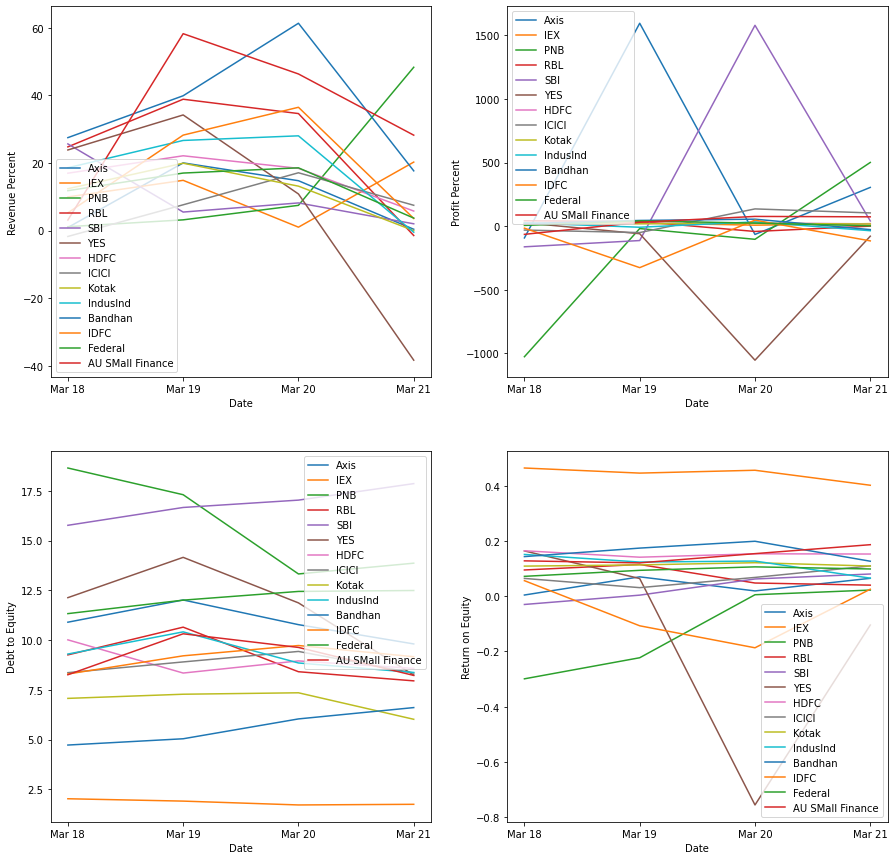

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axs = plt.subplots(2, 2,figsize=(15,15))
# f, axs = plt.subplots(2,2)

# Define X and Y variable data
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['Axis'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['Axis'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['Axis'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['Axis']])
y2 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['IEX'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['IEX'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['IEX'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['IEX']])
y3 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['PNB'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['PNB'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['PNB'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['PNB']])
y4 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['RBL'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['RBL'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['RBL'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['RBL']])
y5 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['SBI'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['SBI'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['SBI'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['SBI']])
y6 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['YES'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['YES'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['YES'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['YES']])
y7 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['HDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['HDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['HDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['HDFC']])
y8 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['ICICI'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['ICICI'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['ICICI'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['ICICI']])
y9 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['Kotak'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['Kotak'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['Kotak'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['Kotak']])
y10 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['IndusInd'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['IndusInd'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['IndusInd'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['IndusInd']])
y11 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['Bandhan'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['Bandhan'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['Bandhan'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['Bandhan']])
y12 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['IDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['IDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['IDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['IDFC']])
y13 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['Federal'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['Federal'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['Federal'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['Federal']])
y14 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_Sales']['AU SMall Finance'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_Sales']['AU SMall Finance'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_Sales']['AU SMall Finance'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_Sales']['AU SMall Finance']])


axs[0, 0].plot(x, y1)
axs[0, 0].plot(x, y2)
axs[0, 0].plot(x, y3)
axs[0, 0].plot(x, y4)
axs[0, 0].plot(x, y5)
axs[0, 0].plot(x, y6)
axs[0, 0].plot(x, y7)
axs[0, 0].plot(x, y8)
axs[0, 0].plot(x, y9)
axs[0, 0].plot(x, y10)
axs[0, 0].plot(x, y11)
axs[0, 0].plot(x, y12)
axs[0, 0].plot(x, y13)
axs[0, 0].plot(x, y14)
# plt.plot(x, y7)
axs[0, 0].set_xlabel("Date")  # add X-axis label
axs[0, 0].set_ylabel("Revenue Percent")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# axs[0, 0].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
axs[0, 0].legend((
 'Axis','IEX','PNB','RBL','SBI', 'YES','HDFC','ICICI','Kotak','IndusInd','Bandhan','IDFC','Federal','AU SMall Finance' ))


# axis[0, 0].plot(X, Y1)
# plt.show()

#######################################################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['Axis'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['Axis'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['Axis'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['Axis']])
y2 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['IEX'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['IEX'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['IEX'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['IEX']])
y3 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['PNB'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['PNB'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['PNB'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['PNB']])
y4 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['RBL'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['RBL'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['RBL'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['RBL']])
y5 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['SBI'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['SBI'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['SBI'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['SBI']])
y6 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['YES'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['YES'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['YES'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['YES']])
y7 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['HDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['HDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['HDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['HDFC']])
y8 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['ICICI'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['ICICI'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['ICICI'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['ICICI']])
y9 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['Kotak'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['Kotak'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['Kotak'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['Kotak']])
y10 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['IndusInd'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['IndusInd'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['IndusInd'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['IndusInd']])
y11 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['Bandhan'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['Bandhan'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['Bandhan'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['Bandhan']])
y12 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['IDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['IDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['IDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['IDFC']])
y13 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['Federal'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['Federal'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['Federal'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['Federal']])
y14 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'CAGR_profit']['AU SMall Finance'],dataframe_creator19[dataframe_creator19['Feature'] == 'CAGR_profit']['AU SMall Finance'], dataframe_creator20[dataframe_creator20['Feature'] == 'CAGR_profit']['AU SMall Finance'], dataframe_creator21[dataframe_creator21['Feature'] == 'CAGR_profit']['AU SMall Finance']])

axs[0, 1].plot(x, y1)
axs[0, 1].plot(x, y2)
axs[0, 1].plot(x, y3)
axs[0, 1].plot(x, y4)
axs[0, 1].plot(x, y5)
axs[0, 1].plot(x, y6)
axs[0, 1].plot(x, y7)
axs[0, 1].plot(x, y8)
axs[0, 1].plot(x, y9)
axs[0, 1].plot(x, y10)
axs[0, 1].plot(x, y11)
axs[0, 1].plot(x, y12)
axs[0, 1].plot(x, y13)
axs[0, 1].plot(x, y14)
# # plt.plot(x, y6)
# # plt.plot(x, y7)
axs[0, 1].set_xlabel('Date')  # add X-axis label
axs[0, 1].set_ylabel("Profit Percent")  # add Y-axis label
# # plt.title("Any suitable title")  # add title
# # plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# # axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[0, 1].legend((
 'Axis','IEX','PNB','RBL','SBI', 'YES','HDFC','ICICI','Kotak','IndusInd','Bandhan','IDFC','Federal','AU SMall Finance' ))


#######################################################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['Axis'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['Axis'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['Axis'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['Axis']])
y2 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['IEX'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['IEX'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['IEX'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['IEX']])
y3 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['PNB'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['PNB'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['PNB'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['PNB']])
y4 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['RBL'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['RBL'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['RBL'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['RBL']])
y5 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['SBI'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['SBI'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['SBI'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['SBI']])
y6 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['YES'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['YES'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['YES'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['YES']])
y7 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['HDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['HDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['HDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['HDFC']])
y8 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['ICICI'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['ICICI'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['ICICI'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['ICICI']])
y9 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['Kotak'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['Kotak'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['Kotak'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['Kotak']])
y10 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['IndusInd'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['IndusInd'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['IndusInd'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['IndusInd']])
y11 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['Bandhan'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['Bandhan'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['Bandhan'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['Bandhan']])
y12 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['IDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['IDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['IDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['IDFC']])
y13 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['Federal'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['Federal'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['Federal'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['Federal']])
y14 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'DE']['AU SMall Finance'],dataframe_creator19[dataframe_creator19['Feature'] == 'DE']['AU SMall Finance'], dataframe_creator20[dataframe_creator20['Feature'] == 'DE']['AU SMall Finance'], dataframe_creator21[dataframe_creator21['Feature'] == 'DE']['AU SMall Finance']])

axs[1, 0].plot(x, y1)
axs[1, 0].plot(x, y2)
axs[1, 0].plot(x, y3)
axs[1, 0].plot(x, y4)
axs[1, 0].plot(x, y5)
axs[1, 0].plot(x, y6)
axs[1, 0].plot(x, y7)
axs[1, 0].plot(x, y8)
axs[1, 0].plot(x, y9)
axs[1, 0].plot(x, y10)
axs[1, 0].plot(x, y11)
axs[1, 0].plot(x, y12)
axs[1, 0].plot(x, y13)
axs[1, 0].plot(x, y14)
# # plt.plot(x, y6)
# # plt.plot(x, y7)
axs[1, 0].set_xlabel('Date')  # add X-axis label
axs[1, 0].set_ylabel("Debt to Equity")  # add Y-axis label
# # plt.title("Any suitable title")  # add title
# # plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# # axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[1, 0].legend((
 'Axis','IEX','PNB','RBL','SBI', 'YES','HDFC','ICICI','Kotak','IndusInd','Bandhan','IDFC','Federal','AU SMall Finance' ))


#######################################################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['Axis'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['Axis'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['Axis'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['Axis']])
y2 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['IEX'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['IEX'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['IEX'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['IEX']])
y3 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['PNB'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['PNB'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['PNB'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['PNB']])
y4 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['RBL'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['RBL'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['RBL'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['RBL']])
y5 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['SBI'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['SBI'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['SBI'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['SBI']])
y6 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['YES'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['YES'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['YES'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['YES']])
y7 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['HDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['HDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['HDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['HDFC']])
y8 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['ICICI'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['ICICI'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['ICICI'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['ICICI']])
y9 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['Kotak'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['Kotak'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['Kotak'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['Kotak']])
y10 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['IndusInd'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['IndusInd'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['IndusInd'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['IndusInd']])
y11 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['Bandhan'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['Bandhan'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['Bandhan'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['Bandhan']])
y12 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['IDFC'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['IDFC'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['IDFC'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['IDFC']])
y13 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['Federal'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['Federal'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['Federal'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['Federal']])
y14 = np.array([dataframe_creator18[dataframe_creator18['Feature'] == 'returnequity']['AU SMall Finance'],dataframe_creator19[dataframe_creator19['Feature'] == 'returnequity']['AU SMall Finance'], dataframe_creator20[dataframe_creator20['Feature'] == 'returnequity']['AU SMall Finance'], dataframe_creator21[dataframe_creator21['Feature'] == 'returnequity']['AU SMall Finance']])

axs[1, 1].plot(x, y1)
axs[1, 1].plot(x, y2)
axs[1, 1].plot(x, y3)
axs[1, 1].plot(x, y4)
axs[1, 1].plot(x, y5)
axs[1, 1].plot(x, y6)
axs[1, 1].plot(x, y7)
axs[1, 1].plot(x, y8)
axs[1, 1].plot(x, y9)
axs[1, 1].plot(x, y10)
axs[1, 1].plot(x, y11)
axs[1, 1].plot(x, y12)
axs[1, 1].plot(x, y13)
axs[1, 1].plot(x, y14)
# # plt.plot(x, y6)
# # plt.plot(x, y7)
axs[1, 1].set_xlabel('Date')  # add X-axis label
axs[1, 1].set_ylabel("Return on Equity")  # add Y-axis label
# # plt.title("Any suitable title")  # add title
# # plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# # axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[1, 1].legend((
 'Axis','IEX','PNB','RBL','SBI', 'YES','HDFC','ICICI','Kotak','IndusInd','Bandhan','IDFC','Federal','AU SMall Finance' ))


#### Mean

In [72]:
PNL_list.keys()

dict_keys(['pnl_axis_pnl', 'pnl_inden_pnl', 'pnl_pnb_pnl', 'pnl_rbl_pnl', 'pnl_sbi_pnl', 'pnl_yes_pnl', 'pnl_hdfc_pnl', 'pnl_icici_pnl', 'pnl_kotak_pnl', 'pnl_indusind_pnl', 'pnl_bandhan_pnl', 'pnl_idfc_pnl', 'pnl_federal_pnl', 'pnl_au_smallfinac_pnl'])

In [140]:
balancesheet_list['BS_axis_bs']

,,Balance Sheet of Axis Bank (in Rs. Cr.),,Mar 21,,Mar 20,,Mar 19,,Mar 18,,Mar 17,,,
0,,,,12 mths,,12 mths,,12 mths,,12 mths,,12 mths,,,
1,,EQUITIES AND LIABILITIES,,,,,,,,,,,,,
2,,SHAREHOLDER'S FUNDS,,,,,,,,,,,,,
3,,Equity Share Capital,,612.75,,564.34,,514.33,,513.31,,479.01,,,
4,,Total Share Capital,,612.75,,564.34,,514.33,,513.31,,479.01,,,
5,,Revaluation Reserve,,0.00,,0.00,,0.00,,0.00,,0.00,,,
6,,Reserves and Surplus,,100990.26,,84383.51,,66161.97,,62931.95,,55283.53,,,
7,,Total Reserves and Surplus,,100990.26,,84383.51,,66161.97,,62931.95,,55283.53,,,
8,,Total ShareHolders Funds,,101603.01,,84947.84,,66676.30,,63445.26,,55762.54,,,
9,,Deposits,,707306.08,,640104.94,,548471.34,,453622.72,,414378.79,,,


In [134]:
# (PNL_list['pnl_axis_pnl'][PNL_list['pnl_axis_pnl'].iloc[:, 1].isin(['Total Revenue', 'Total Income'])][year]).astype('float').values

In [64]:
def averagecalculation(dataarray, datatype ,  mode,duration):
    average_array = 0
    for i in dataarray:
        average_array = average_array + summation(datatype[i], mode,duration )
        
    return average_array

In [79]:
dataarray = ['pnl_axis_pnl', 'pnl_inden_pnl']
averagecalculation(dataarray, PNL_list ,'Total Revenue' , 'Mar 21')

array([], dtype=float64)

In [ ]:
PNL_list

In [69]:
months = example(PNL_list['pnl_axis_pnl'])[:-1]
months

['Mar 21', 'Mar 20', 'Mar 19', 'Mar 18']

In [135]:
stock_list = []
for i in PNL_list.keys():
    stock_list.append(i)
# stock_list
balancesheet_l = []
for i in balancesheet_list.keys():
    balancesheet_l.append(i)

In [136]:
sum_sales = {}
sum_profit = {}

for i in months:
    sum_sales[i] = averagecalculation(stock_list, PNL_list,['Total Revenue','Total Income'],i)
for i in months:
    sum_profit[i] = averagecalculation(stock_list, PNL_list,['Profit/Loss For The Period' , 'Net Profit / Loss for The Year'],i)
  

In [119]:
def rel(res):
    res = res.apply(lambda x: x.str.replace(',', ''))
    return res

In [121]:
for i in balancesheet_list.keys():
    balancesheet_list[i] = rel (balancesheet_list[i])

In [129]:
liabilities = {}
shareholderfund = {}
for i in months:
    liabilities[i] = averagecalculation(balancesheet_l, balancesheet_list,['Total Capital And Liabilities','Total Capital and Liabilities'],i)
for i in months:
    shareholderfund[i] = averagecalculation(balancesheet_l, balancesheet_list,['Total Shareholders Funds','Total ShareHolders Funds'],i)

In [141]:
# fixedasset = {}
# opertingcashflow = {}
# for i in months:
#     fixedasset[i] = averagecalculation(balancesheet_l, balancesheet_list,['Fixed Assets'],i)
# for i in months:
#     opertingcashflow[i] = averagecalculation(balancesheet_l, balancesheet_list,['Net CashFlow From Operating Activities'],i)

In [183]:
CAGR_AverageIndex_Sales21 = (sum_sales['Mar 21'] / sum_sales['Mar 20'] -1 )*100
CAGR_AverageIndex_Sales20 = (sum_sales['Mar 20'] / sum_sales['Mar 19'] -1) *100
CAGR_AverageIndex_Sales19 = (sum_sales['Mar 19'] / sum_sales['Mar 18'] -1)*100
# CAGR_AverageIndex_Sales18 = sum_sales['Mar 18'] / sum_sales['Mar 17'] -1 
# # CAGR_AverageIndex_Sales18 = Sum_Sales_average18 / Sum_Sales_average17 -1 

CAGR_AverageIndex_profit21 = (sum_profit['Mar 21'] / sum_profit['Mar 20'] -1 )*100
CAGR_AverageIndex_profit20 =( sum_profit['Mar 20'] / sum_profit['Mar 19'] -1)*100
CAGR_AverageIndex_profit19 = (sum_profit['Mar 19'] / sum_profit['Mar 18'] -1)*100

ROE_AverageIndex21 =( sum_profit['Mar 21'] / shareholderfund['Mar 21'])*100
ROE_AverageIndex20 =( sum_profit['Mar 20'] / shareholderfund['Mar 20'])*100
ROE_AverageIndex19 = (sum_profit['Mar 19'] / shareholderfund['Mar 19'])*100
ROE_AverageIndex18 = (sum_profit['Mar 18'] / shareholderfund['Mar 18'])*100

DE_AverageIndex21 = (liabilities['Mar 21'] / shareholderfund['Mar 21'])
DE_AverageIndex20 = (liabilities['Mar 20'] / shareholderfund['Mar 20'])
DE_AverageIndex19 = (liabilities['Mar 19'] / shareholderfund['Mar 19'] )
DE_AverageIndex18 =( liabilities['Mar 18'] / shareholderfund['Mar 18'] )

# PE_AverageIndex21 = (it_index.iloc[4:5,1:].sum(axis =1).values  ) / (len(index_stock_bs))

In [185]:
DE_AverageIndex18

array([12.03747121])

In [156]:
benchmark_stock = ['Axis','PNB','RBL','SBI','ICICI','Federal','IDFC','Bandhan',   'IndusInd','AU SMall Finance','Kotak','HDFC']
avg_PE = dataframe_creator21[dataframe_creator21['Feature'] =='PE'][benchmark_stock].sum(axis =1).values / len(benchmark_stock)

In [255]:
CAGR_AverageIndex_Sales21

array([4.96708972])

In [256]:
CAGR_AverageIndex_profit21

array([86.38752301])

In [254]:
dataframe_creator21

,Axis,IEX,PNB,RBL,SBI,YES,HDFC,ICICI,Kotak,IndusInd,Bandhan,IDFC,Federal,AU SMall Finance,Feature
0,[0.39882709501595226],[20.27258960121152],[48.33589539678371],[-1.4604834895818875],[2.0168697510093203],[-38.34217139421619],[5.786520755942459],[7.495988358623307],[-0.006996531454062094],[-0.4917706148797607],[17.68101979221033],[3.5935704714241012],[3.7026421593748804],[28.237693259989037],CAGR_Sales
1,[304.89300770639494],[19.992131294964043],[501.33257979118946],[0.4172681788518151],[40.87738152181342],[-78.91202537697885],[18.506115627946794],[104.1743529349461],[17.111639466099902],[-35.79792254708675],[-27.06185055593403],[-115.79074160065079],[3.0801540077003864],[73.49061916476482],CAGR_profit
2,[9.804024703598841],[1.7448249905908921],[13.862655713040116],[7.948665279903464],[17.8608615910834],[8.240150944396564],[8.57482526455444],[8.341396763144045],[6.017477721726313],[8.37009842637254],[6.605690543181424],[9.161325682043184],[12.48897672419514],[8.221434467636193],DE
3,18.02,65.56,9.09,NaN,13.17,NaN,19.94,22.22,33.89,16.47,NaN,NaN,10.64,NaN,PE
4,[0.06484551983253252],[0.4017500940910802],[0.02223091930033998],[0.04010083253175893],[0.08039568576984621],[-0.10429556520253895],[0.15274103291254018],[0.1097740418749503],[0.10928817010368728],[0.06540673776634418],[0.12669101537323257],[0.02539773100575082],[0.09863175802441264],[0.18655600919170962],returnequity
5,[13582.64],[304.36],[1192.13],[7596.9],[89865.54],[50155.94],[41494.79],[124093.36],[-5298.3],[44645.59],[-944.56],[14061.47],[12207.21],[5056.1],operating cash flow
6,[9337.61],[182.96],[-9828.77],[7130.42],[51446.299999999996],[48007.41],[36585.47],[115215.78],[-6833.57],[42836.219999999994],[-1431.27],[12795.05],[11716.08],[4573.7300000000005],free cash fllow


#### Stock Selection

In [176]:
dataframe_creator21[dataframe_creator21['Feature'] =='CAGR_Sales']['ICICI'].values.astype('float')

array([7.49598836])

In [253]:
dataframe_creator21[dataframe_creator21['Feature'] =='CAGR_profit']['PNB']

1    [501.33257979118946]
Name: PNB, dtype: object

In [177]:
CAGR_AverageIndex_Sales21

array([0.0496709])

In [248]:
def selected_stock(dataframe_creator21):
    target_stock = []

    for col in dataframe_creator21.columns[:-1]:
        if( (dataframe_creator21[dataframe_creator21['Feature'] =='CAGR_Sales'][col].values.astype('float') >= CAGR_AverageIndex_Sales21)
          & (dataframe_creator21[dataframe_creator21['Feature'] =='CAGR_profit'][col].values >= CAGR_AverageIndex_profit21)
          & (dataframe_creator21[dataframe_creator21['Feature'] =='PE'][col].values <= 1.2*avg_PE)
          ):
            target_stock.append(col)
#     print(target_stock)
    return target_stock

In [249]:
selected_stock(dataframe_creator21)

C:\Users\Aman\AppData\Local\Temp/ipykernel_23148/2314507006.py:7: RuntimeWarning: invalid value encountered in less_equal
  & (dataframe_creator21[dataframe_creator21['Feature'] =='PE'][col].values <= 1.2*avg_PE)


['PNB']

In [168]:
# PNL_list['pnl_axis_pnl'][0]

In [250]:
avg_PE

array([11.95333333])

In [139]:
fixedasset

{'Mar 21': array([76279.75]),
 'Mar 20': array([70209.99]),
 'Mar 19': array([68314.63]),
 'Mar 18': array([67841.51])}

In [132]:
liabilities

{'Mar 21': array([11421161.45]),
 'Mar 20': array([9804582.41]),
 'Mar 19': array([8933331.5]),
 'Mar 18': array([8044442.31])}

In [131]:
shareholderfund

{'Mar 21': array([1008745.28]),
 'Mar 20': array([832659.73]),
 'Mar 19': array([740156.79]),
 'Mar 18': array([668283.41])}

In [95]:
sum_profit

{'Mar 21': array([88808.79]),
 'Mar 20': array([47647.39]),
 'Mar 19': array([32556.54]),
 'Mar 18': array([21766.94])}

In [96]:
sum_sales

{'Mar 21': array([881671.49]),
 'Mar 20': array([839950.4]),
 'Mar 19': array([736440.1]),
 'Mar 18': array([652349.46])}

In [106]:
balancesheet_list.keys()

dict_keys(['BS_axis_bs', 'BS_inden_bs', 'BS_pnb_bs', 'BS_rbl_bs', 'BS_sbi_bs', 'BS_yes_bs', 'BS_hdfc_bs', 'BS_icici_bs', 'BS_kotak_bs', 'BS_indusind_bs', 'BS_bandhan_bs', 'BS_idfc_bs', 'BS_federal_bs', 'BS_au_smallfinac_bs'])

In [113]:
balancesheet_list['BS_axis_bs'][balancesheet_list['BS_axis_bs'].iloc[:, 1].isin(['Total Capital And Liabilities','Total Capital and Liabilities'])
                        

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_23148/3531604480.py, line 2)

In [117]:
balancesheet_list['BS_axis_bs'][balancesheet_list['BS_axis_bs'].iloc[:, 1].isin(['Total Capital and Liabilities'])]

,,Balance Sheet of Axis Bank (in Rs. Cr.),,Mar 21,,Mar 20,,Mar 19,,Mar 18,,Mar 17,,,
12,,Total Capital and Liabilities,,"996,118.42",,"915,164.82",,"800,996.53",,"691,329.58",,"601,467.67",,,


In [128]:
balancesheet_list['BS_axis_bs']

,,Balance Sheet of Axis Bank (in Rs. Cr.),,Mar 21,,Mar 20,,Mar 19,,Mar 18,,Mar 17,,,
0,,,,12 mths,,12 mths,,12 mths,,12 mths,,12 mths,,,
1,,EQUITIES AND LIABILITIES,,,,,,,,,,,,,
2,,SHAREHOLDER'S FUNDS,,,,,,,,,,,,,
3,,Equity Share Capital,,612.75,,564.34,,514.33,,513.31,,479.01,,,
4,,Total Share Capital,,612.75,,564.34,,514.33,,513.31,,479.01,,,
5,,Revaluation Reserve,,0.00,,0.00,,0.00,,0.00,,0.00,,,
6,,Reserves and Surplus,,100990.26,,84383.51,,66161.97,,62931.95,,55283.53,,,
7,,Total Reserves and Surplus,,100990.26,,84383.51,,66161.97,,62931.95,,55283.53,,,
8,,Total ShareHolders Funds,,101603.01,,84947.84,,66676.30,,63445.26,,55762.54,,,
9,,Deposits,,707306.08,,640104.94,,548471.34,,453622.72,,414378.79,,,
